Task 4.1

Возьмем запись природного шума (звук моря) и по спектру мощности попробуем определить на какой из видов шума он похож.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import read_wave

In [3]:
wave = read_wave("13793__soarer__north-sea.wav")
segment = wave.segment(start = 2, duration= 1.5)
segment.make_audio()

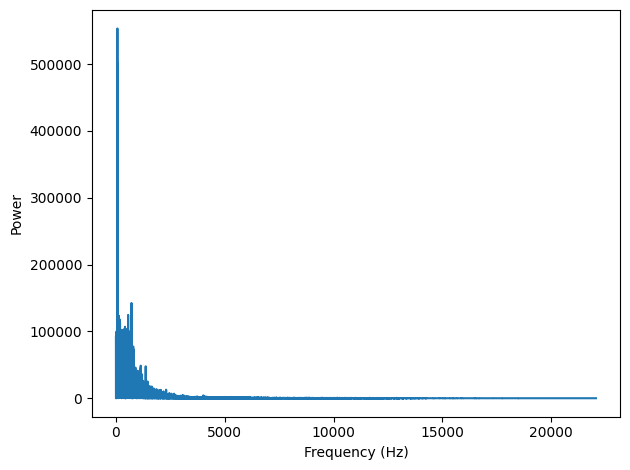

In [4]:
from thinkdsp import decorate

spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

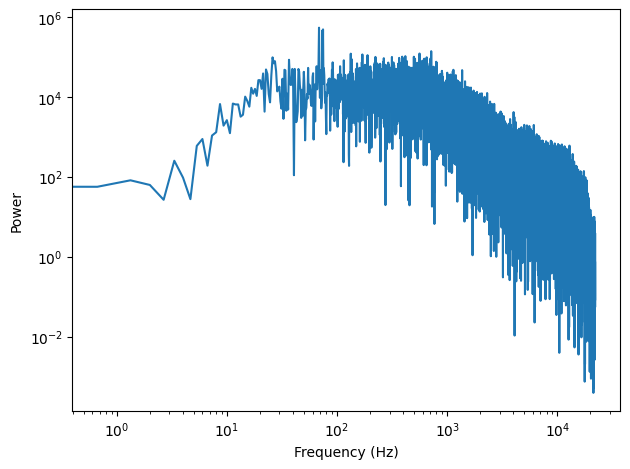

In [5]:
spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

In [6]:
segment2 = wave.segment(start=5, duration=1.5)
segment2.make_audio()

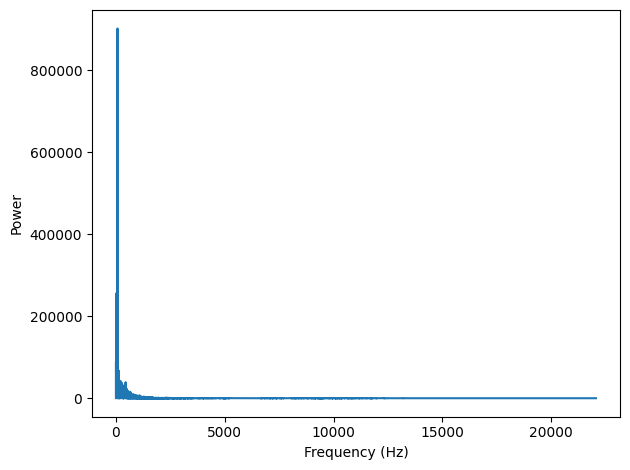

In [7]:
spectrum2 = segment2.make_spectrum()
spectrum2.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

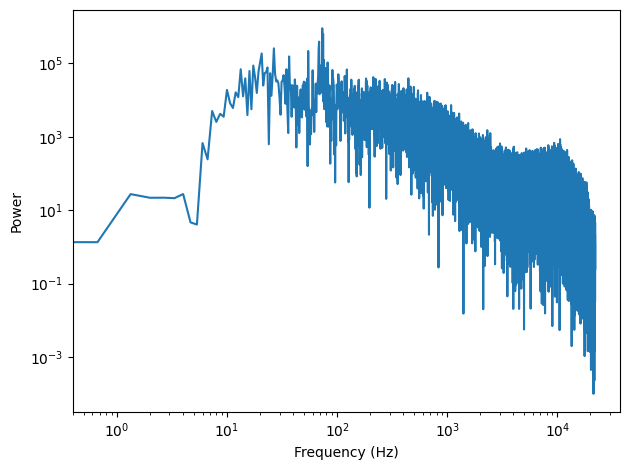

In [8]:
spectrum2.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power', 
         **loglog)

In [34]:
spectrum.estimate_slope()[0]

-1.7332540936758956

In [33]:
spectrum2.estimate_slope()[0]

-1.6440243905568521

По полученным результатам можно сказать, что данный шум наиболее похож на розовый шум с сильным приближением к красному. На это указывают изображения диаграмм и значения уклона. 

Task 4.2

Реализуем метод Бартлетта для оценки спектра мощности шумового сигнала. В качестве примера рассмотрим взятый звук с шумом моря.

In [15]:
from thinkdsp import Spectrum

def bartlett_method(wave, seg_length=512, win_flag=True):
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()
    
    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]
    
    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs
    
    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

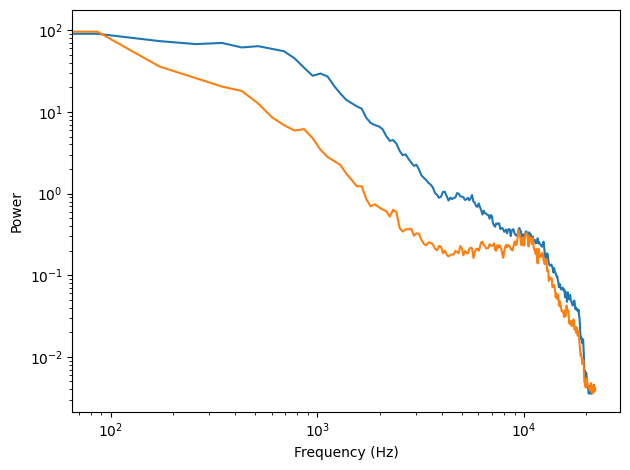

In [17]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', 
         ylabel='Power', 
         **loglog)

На полученной диаграмме видна зависимость двух различных сегментов одного сигнала. Местами их поведение полностью идентично.

Task 4.3

На основе исторических данных о ежедневной цене BitCoin вычислим спектр цен как функцию времени. Попробуем определить к какому виду шума будет относиться полученный спектр.

In [25]:
import os

if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [26]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', 
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


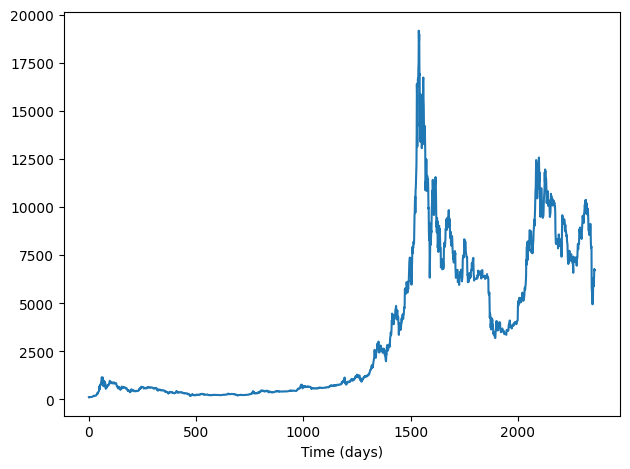

In [28]:
from thinkdsp import Wave

ys = df['Closing Price (USD)']
ts = df.index

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

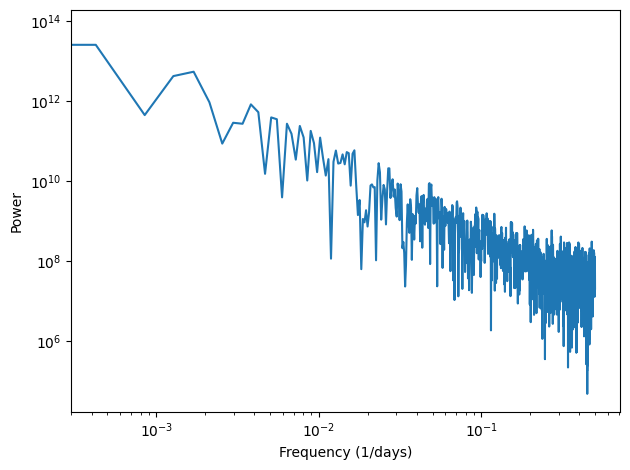

In [29]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [30]:
spectrum.estimate_slope()[0]

-1.7332540936758956

По полученной диаграмме и значению уклона можно рассмотривать данный сигнал как розовый шум, очень близкий к красному.

Task 4.4

Реализуем класс, который будет генерировать сигнал, похожий на счетчик Гейгера на малых амплитудах и на белый шум на больших.

In [9]:
from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

In [10]:
signal = UncorrelatedPoissonNoise(0.001)
wave = signal.make_wave(duration=2, framerate=10000)
wave.make_audio()

In [11]:
signal2 = UncorrelatedPoissonNoise(1)
wave2 = signal2.make_wave(duration=2, framerate=10000)
wave2.make_audio()

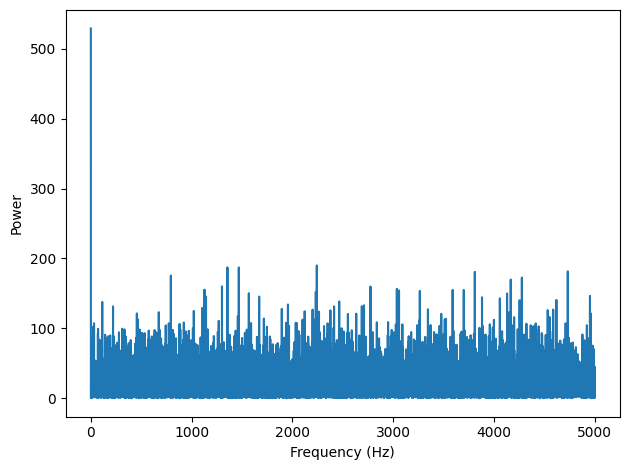

In [12]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

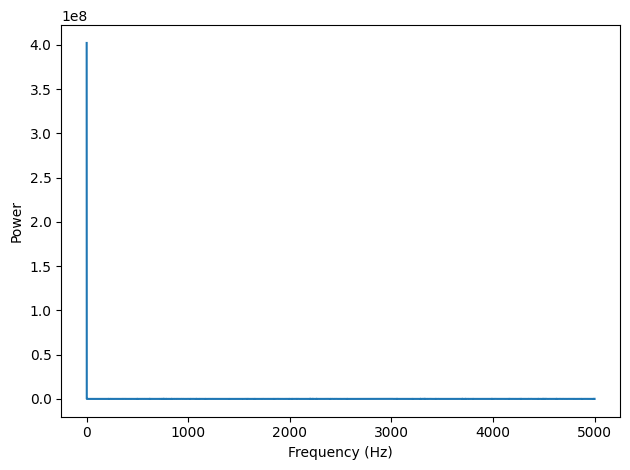

In [15]:
spectrum2 = wave2.make_spectrum()
spectrum2.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

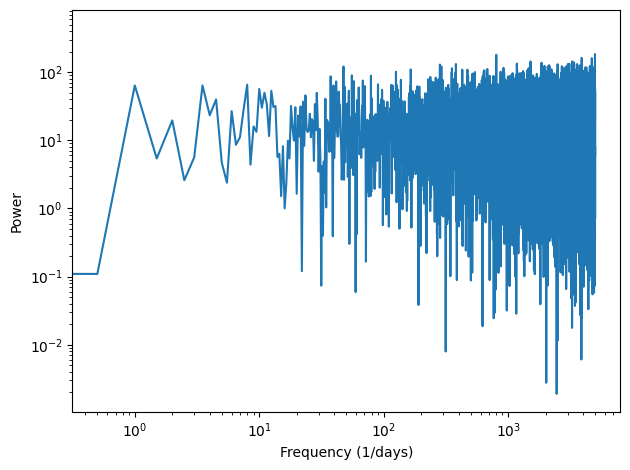

In [47]:
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

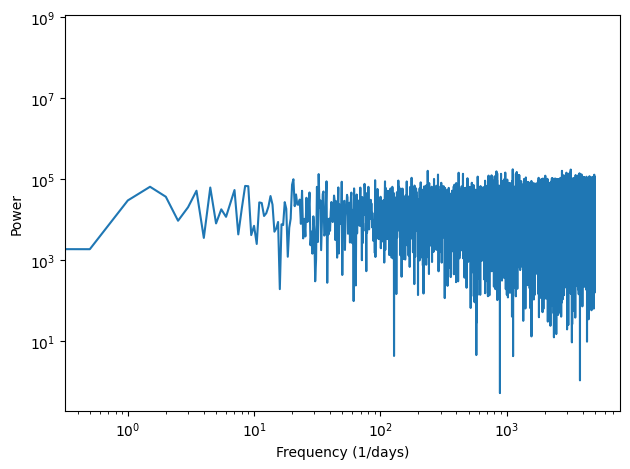

In [48]:
spectrum2 = wave2.make_spectrum()
spectrum2.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [50]:
spectrum2.estimate_slope()[0]

-0.012456802257386239

Полученные результаты совпали с ожидаемыми. На малой амплитуде (было взято значение 0.001) сигнал сильно напоминает звук счетчика Гейгера. При больших значения он переходит в белый шум, о чем говорит диаграмма и значение уклона.

Task 4.5

Реализуем алгоритм Voss-McCartney для генерации розового шума, отличающийся своей эффективностью.

In [62]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.ffill(axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

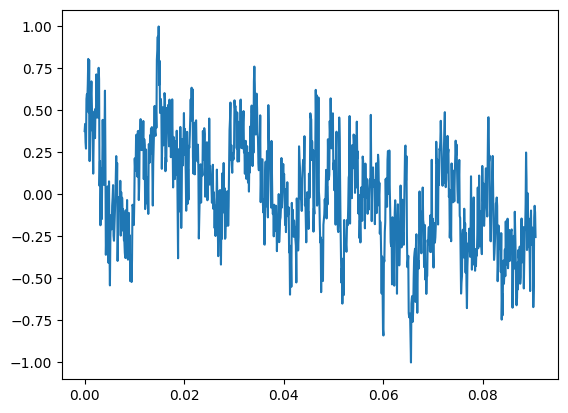

In [68]:
wave = Wave(voss(1000))
wave.unbias()
wave.normalize() 
wave.plot()

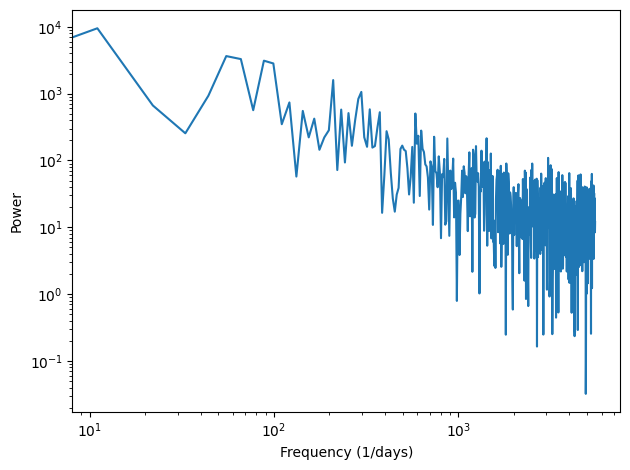

In [73]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power', 
         **loglog)

In [74]:
spectrum.estimate_slope()[0]

-1.050755272010246

Полученный сигнал полностью соответствует розовому шуму. В этом можно убедиться, рассмотрев соотношение между мощностью и частотой на диаграмме, а также значение уклона.